In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from torchvision import ops
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.colors as mcolors
import urllib.request as request
import random
from PIL import Image
from skimage import io
import glob

# Background Substraction

## Highway

In [56]:
imageB1 = (cv2.imread('baseline/highway/input/in000470.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB2 = (cv2.imread('baseline/highway/input/in000473.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB3 = (cv2.imread('baseline/highway/input/in000476.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB4 = (cv2.imread('baseline/highway/input/in000479.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB5 = (cv2.imread('baseline/highway/input/in000482.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB6 = (cv2.imread('baseline/highway/input/in000485.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB7 = (cv2.imread('baseline/highway/input/in000488.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB8 = (cv2.imread('baseline/highway/input/in000491.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB9 = (cv2.imread('baseline/highway/input/in000494.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB10 = (cv2.imread('baseline/highway/input/in000497.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB11 = (cv2.imread('baseline/highway/input/in000500.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
MoyB = (imageB1+imageB2+imageB3+imageB4+imageB5+imageB6+imageB7+imageB8+imageB9+imageB10+imageB11)/11.0
VarB = (np.power(imageB1,2) + np.power(imageB2,2) + np.power(imageB3,2) + np.power(imageB4,2) + np.power(imageB5,2) + 
        np.power(imageB6,2) + np.power(imageB7,2) + np.power(imageB8,2) + np.power(imageB9,2) + np.power(imageB10,2) +
        np.power(imageB11,2))/11.0 - np.power(MoyB,2)
n = 75 #Ajuste la sensibilité de la détection
for i in range(1231):
  
  image = (cv2.imread('baseline/highway/input/in'+str(i+470).zfill(6)+'.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
  avantplan = np.abs(image - MoyB)> n
  if np.amax(avantplan.astype(int)  ) != 0:                
        IMG = cv2.normalize(avantplan.astype(int)  , dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
  else:
        IMG = np.zeros((240,320,3),dtype=np.uint8)
  cv2.imwrite('baseline/highway/results/background/bg'+str(i+470).zfill(6)+'.png', IMG)  

In [57]:
img_array = []
for filename in glob.glob('baseline/highway/results/background/*.png'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('baseline/highway/background.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

## Office

In [41]:
imageB1 = (cv2.imread('baseline/office/input/in000570.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB2 = (cv2.imread('baseline/office/input/in000572.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB3 = (cv2.imread('baseline/office/input/in000574.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB4 = (cv2.imread('baseline/office/input/in000576.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB5 = (cv2.imread('baseline/office/input/in000578.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB6 = (cv2.imread('baseline/office/input/in000580.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB7 = (cv2.imread('baseline/office/input/in002042.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB8 = (cv2.imread('baseline/office/input/in002044.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB9 = (cv2.imread('baseline/office/input/in002046.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB10 = (cv2.imread('baseline/office/input/in002048.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB11 = (cv2.imread('baseline/office/input/in002050.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
MoyB = (imageB1+imageB2+imageB3+imageB4+imageB5+imageB6+imageB7+imageB8+imageB9+imageB10+imageB11)/11.0
VarB = (np.power(imageB1,2) + np.power(imageB2,2) + np.power(imageB3,2) + np.power(imageB4,2) + np.power(imageB5,2) + 
        np.power(imageB6,2) + np.power(imageB7,2) + np.power(imageB8,2) + np.power(imageB9,2) + np.power(imageB10,2) +
        np.power(imageB11,2))/11.0 - np.power(MoyB,2)
N = 2050-569
results = [0] * N
n = 75 #Ajuste la sensibilité de la détection
for i in range(N):
  
  image = (cv2.imread('baseline/office/input/in'+str(i+570).zfill(6)+'.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
  avantplan = np.abs(image - MoyB)> n
  if np.amax(avantplan.astype(int)  ) != 0:                
        IMG = cv2.normalize(avantplan.astype(int)  , dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
  else:
        IMG = np.zeros((240,360,3),dtype=np.uint8)
  cv2.imwrite('baseline/office/results/background/bg'+str(i+570).zfill(6)+'.png', IMG)  


In [42]:
img_array = []
for filename in glob.glob('baseline/office/results/background/*.png'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('baseline/office/background.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

## Pedestrians 

In [50]:
# Empty between 300-305,712-826 and 1053-1099
imageB1 = (cv2.imread('baseline/pedestrians/input/in000300.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB2 = (cv2.imread('baseline/pedestrians/input/in000712.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB3 = (cv2.imread('baseline/pedestrians/input/in000732.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB4 = (cv2.imread('baseline/pedestrians/input/in000752.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB5 = (cv2.imread('baseline/pedestrians/input/in000772.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB6 = (cv2.imread('baseline/pedestrians/input/in000792.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB7 = (cv2.imread('baseline/pedestrians/input/in000812.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB8 = (cv2.imread('baseline/pedestrians/input/in001059.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB9 = (cv2.imread('baseline/pedestrians/input/in001079.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB10 = (cv2.imread('baseline/pedestrians/input/in001099.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
MoyB = (imageB1+imageB2+imageB3+imageB4+imageB5+imageB6+imageB7+imageB8+imageB9+imageB10)/10.0
VarB = (np.power(imageB1,2) + np.power(imageB2,2) + np.power(imageB3,2) + np.power(imageB4,2) +
        np.power(imageB5,2) + np.power(imageB6,2) + np.power(imageB7,2) + np.power(imageB8,2) +
        np.power(imageB9,2) + np.power(imageB10,2))/10.0 - np.power(MoyB,2)

N = 1100-299
n = 50 #Ajuste la sensibilité de la détection
for i in range(300,1100):
  
  image = (cv2.imread('baseline/pedestrians/input/in'+str(i).zfill(6)+'.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
  avantplan = np.abs(image - MoyB)> n
  if np.amax(avantplan.astype(int)  ) != 0:                
        IMG = cv2.normalize(avantplan.astype(int)  , dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
  else:
        IMG = np.zeros((240,360,3),dtype=np.uint8)
  cv2.imwrite('baseline/pedestrians/results/background/bg'+str(i).zfill(6)+'.png', IMG)  


In [51]:
img_array = []
for filename in glob.glob('baseline/pedestrians/results/background/*.png'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('baseline/pedestrians/background.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

## PETS2006

In [52]:
imageB1 = (cv2.imread('baseline/PETS2006/input/in000001.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB2 = (cv2.imread('baseline/PETS2006/input/in000002.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB3 = (cv2.imread('baseline/PETS2006/input/in000003.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB4 = (cv2.imread('baseline/PETS2006/input/in000004.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB5 = (cv2.imread('baseline/PETS2006/input/in000005.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB6 = (cv2.imread('baseline/PETS2006/input/in000006.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imageB = (imageB1+imageB2+imageB3+imageB4+imageB5+imageB6)/6

N = 1200-299
n = 25 #Ajuste la sensibilité de la détection
for i in range(N):
    
  image = (cv2.imread('baseline/PETS2006/input/in'+str(i+300).zfill(6)+'.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
  avantplan = np.abs(image - imageB)> n
  if np.amax(avantplan.astype(int)  ) != 0:                
        IMG = cv2.normalize(avantplan.astype(int)  , dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
  else:
        IMG = np.zeros((240,320,3),dtype=np.uint8)
  cv2.imwrite('baseline/PETS2006/results/background/bg'+str(i+300).zfill(6)+'.png', IMG)  

In [53]:
img_array = []
for filename in glob.glob('baseline/PETS2006/results/background/*.png'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('baseline/PETS2006/background.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

#  Instance Segmentation

In [87]:
from torchvision import models
import torch
 
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [18]:
alexnet = models.alexnet(pretrained=True)
print(alexnet)

C:\Users\emile\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\emile\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

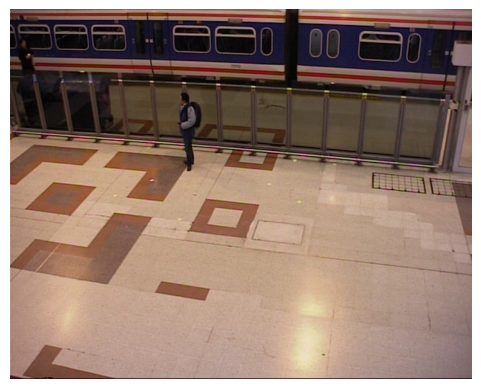

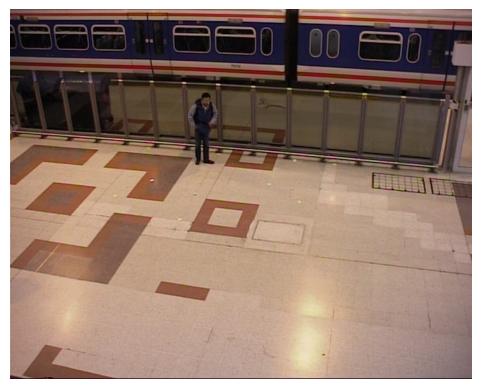

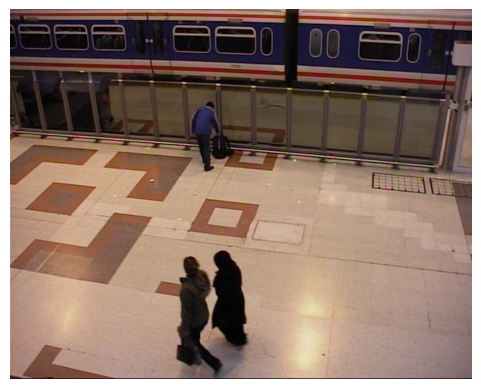

In [88]:
examples = ['baseline/PETS2006/input/in000350.jpg', 'baseline/PETS2006/input/in000800.jpg', 'baseline/PETS2006/input/in000950.jpg']

tensors = []
preprocess = transforms.Compose([transforms.ToTensor()])

for example in examples:
  img = io.imread(example)
  tensors.append(preprocess(img))
  plt.imshow(img); plt.axis('off'); plt.show()

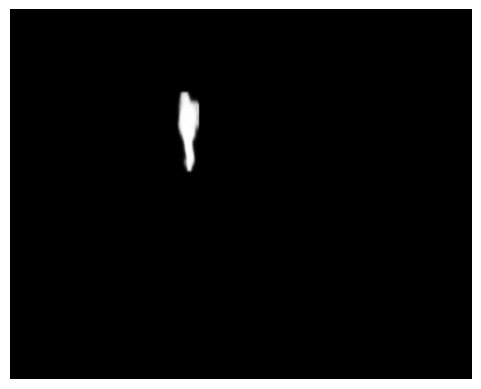

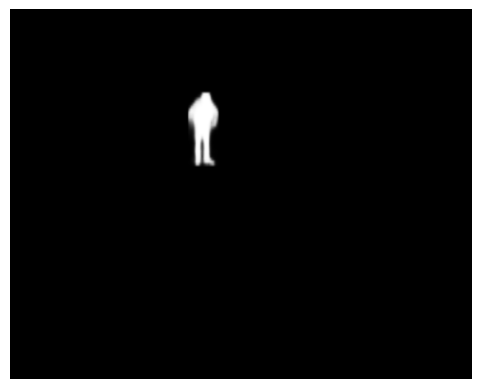

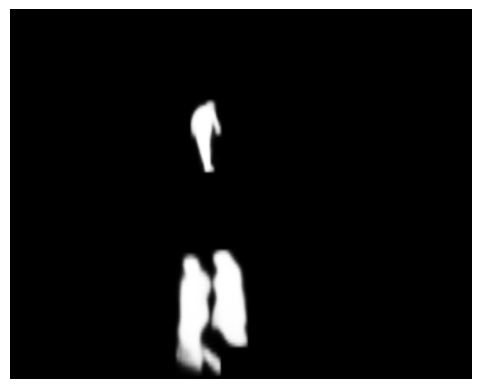

In [141]:
model = models.detection.maskrcnn_resnet50_fpn(pretrained=True).eval()
predictions = model(tensors)
for prediction in predictions:
    mask = [[0] * 720] * 576
    for i in range(0,len(prediction['labels'])):
        if(prediction['labels'].numpy()[i] == 1):
            if(prediction['scores'].detach().numpy()[i] > 0.95):
                mask += prediction['masks'][i][0].detach().numpy()
                
    
    plt.imshow(mask,cmap = plt.get_cmap('gray')); plt.axis('off'); plt.show()

## PETS2006

In [106]:
N = 1200-299
results = [0] * N
tensors = []
preprocess = transforms.Compose([transforms.ToTensor()])
model = models.detection.maskrcnn_resnet50_fpn(pretrained=True).eval()
for i in range(N):
    tensors = []
    image = cv2.imread('baseline/PETS2006/input/in'+str(i+300).zfill(6)+'.jpg',cv2.IMREAD_GRAYSCALE)
    tensors.append(preprocess(image))  
    #model = models.detection.maskrcnn_resnet50_fpn(pretrained=True).eval()
    predictions = model(tensors)
    mask = [[0] * 720] * 576
    element = 0
    for k in range(0,len(predictions[0]['labels'])):
        if(predictions[0]['labels'].numpy()[k] == 1 or predictions[0]['labels'].numpy()[k] == 27):
                if(predictions[0]['scores'].detach().numpy()[k] > 0.65):
                    mask += (predictions[0]['masks'][k][0].detach().numpy())
    if np.amax(mask) != 0:                
        IMG = cv2.normalize(mask, dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    else:
        IMG = np.zeros((576,720,3),dtype=np.uint8)
    cv2.imwrite('baseline/PETS2006/results/instance/re'+str(i+300).zfill(6)+'.png', IMG)     

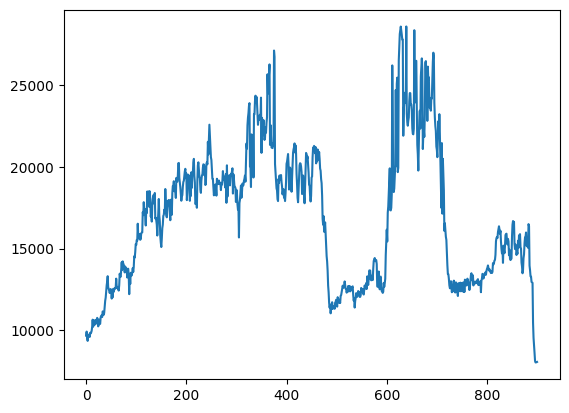

In [44]:
# RESULTS OF INSTANCE SEGMENTATION FOR PETS2006
N = 1200-299
results = [0] * N
for i in range(N):
    ref = cv2.imread('baseline/PETS2006/groundtruth/gt'+str(i+300).zfill(6)+'.png',cv2.IMREAD_GRAYSCALE)
    img = cv2.imread('baseline/PETS2006/results/instance/re'+str(i+300).zfill(6)+'.png',cv2.IMREAD_GRAYSCALE)
    results[i] = np.linalg.norm(ref - img) 
    
t = np.linspace(0, N-1, N,dtype=int) 
plt.plot(t, results)
plt.show()    

## Office

In [57]:
# INSTANCE SEGMENTATION FOR OFFICE
N = 2050-569
results = [0] * N
tensors = []
preprocess = transforms.Compose([transforms.ToTensor()])
for i in range(N):
    tensors = []
    image = cv2.imread('baseline/office/input/in'+str(i+570).zfill(6)+'.jpg',cv2.IMREAD_GRAYSCALE)
    tensors.append(preprocess(image))  
    model = models.detection.maskrcnn_resnet50_fpn(pretrained=True).eval()
    predictions = model(tensors)
    mask = [[0] * 360] * 240
    for k in range(0,len(predictions[0]['labels'])):
        if(predictions[0]['labels'].numpy()[k] == 1 or predictions[0]['labels'].numpy()[k] == 84):
                if(predictions[0]['scores'].detach().numpy()[k] > 0.98):
                    mask += predictions[0]['masks'][k][0].detach().numpy()
    if np.amax(mask) != 0:                
        IMG = cv2.normalize(mask, dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    else:
        IMG = np.zeros((240,360,3),dtype=np.uint8)
    cv2.imwrite('baseline/office/results/instance/re'+str(i+570).zfill(6)+'.png', IMG)  

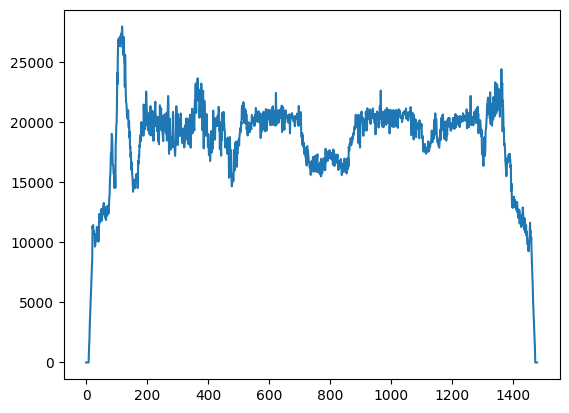

In [58]:
# RESULTS OF INSTANCE SEGMENTATION FOR OFFICE
N = 2050-569
results = [0] * N
for i in range(N):
    ref = cv2.imread('baseline/office/groundtruth/gt'+str(i+570).zfill(6)+'.png',cv2.IMREAD_GRAYSCALE)
    img = cv2.imread('baseline/office/results/instance/re'+str(i+300).zfill(6)+'.png',cv2.IMREAD_GRAYSCALE)
    results[i] = np.linalg.norm(ref - img) 
    
t = np.linspace(0, N-1, N,dtype=int) 
plt.plot(t, results)
plt.show()    

## Highway

In [67]:
# INSTANCE SEGMENTATION FOR HIGHWAY
N = 1700+469
results = [0] * N
tensors = []
preprocess = transforms.Compose([transforms.ToTensor()])
for i in range(N):
    tensors = []
    image = cv2.imread('baseline/highway/input/in'+str(i+470).zfill(6)+'.jpg',cv2.IMREAD_GRAYSCALE)
    tensors.append(preprocess(image))  
    model = models.detection.maskrcnn_resnet50_fpn(pretrained=True).eval()
    predictions = model(tensors)
    mask = [[0] * 320] * 240
    for k in range(0,len(predictions[0]['labels'])):
        if(predictions[0]['labels'].numpy()[k] == 3):
                if(predictions[0]['scores'].detach().numpy()[k] > 0.50):
                    mask += predictions[0]['masks'][k][0].detach().numpy()
    if np.amax(mask) != 0:                
        IMG = cv2.normalize(mask, dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    else:
        IMG = np.zeros((240,320,3),dtype=np.uint8)
    cv2.imwrite('baseline/highway/results/instance/re'+str(i+470).zfill(6)+'.png', IMG)  

TypeError: pic should be PIL Image or ndarray. Got <class 'NoneType'>

## Pedestrians

In [70]:
# INSTANCE SEGMENTATION FOR PEDESTRIANS
# If we put a filter for bike, the static bike is found in every frame.
N = 1099-299
results = [0] * N
tensors = []
preprocess = transforms.Compose([transforms.ToTensor()])
for i in range(N):
    tensors = []
    image = cv2.imread('baseline/pedestrians/input/in'+str(i+300).zfill(6)+'.jpg',cv2.IMREAD_GRAYSCALE)
    tensors.append(preprocess(image))  
    model = models.detection.maskrcnn_resnet50_fpn(pretrained=True).eval()
    predictions = model(tensors)
    mask = [[0] * 360] * 240
    for k in range(0,len(predictions[0]['labels'])):
        if(predictions[0]['labels'].numpy()[k] == 1):
                if(predictions[0]['scores'].detach().numpy()[k] > 0.96):
                    mask += predictions[0]['masks'][k][0].detach().numpy()
    if np.amax(mask) != 0:                
        IMG = cv2.normalize(mask, dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    else:
        IMG = np.zeros((240,360,3),dtype=np.uint8)
    cv2.imwrite('baseline/pedestrians/results/instance/re'+str(i+300).zfill(6)+'.png', IMG) 

# Play video

In [68]:
img_array = []
for filename in glob.glob('baseline/highway/results/instance/*.png'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('baseline/highway/instance_50.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

# Compare results

## Highway

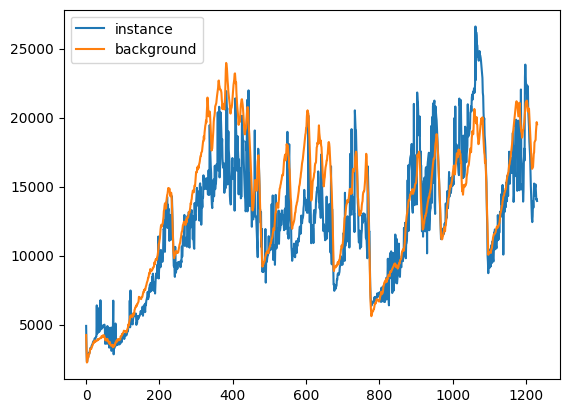

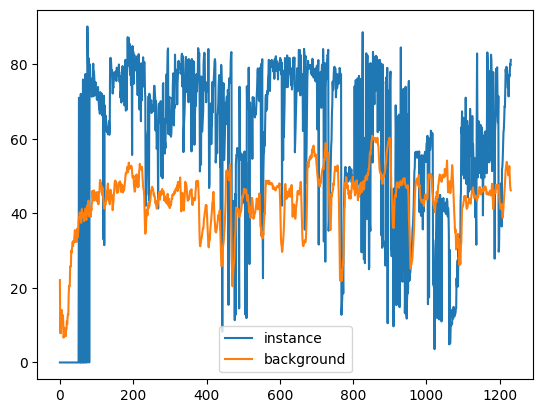

In [69]:
error_instance = []
error_background = [] 
iou_instance = []
iou_background = []
for i in range(470,1701) :
    instance = cv2.imread('baseline/highway/results/instance_90/re'+str(i).zfill(6)+'.png',cv2.IMREAD_GRAYSCALE)
    background = cv2.imread('baseline/highway/results/background/bg'+str(i).zfill(6)+'.png',cv2.IMREAD_GRAYSCALE)
    groundtruth = cv2.imread('baseline/highway/groundtruth/gt'+str(i).zfill(6)+'.png',cv2.IMREAD_GRAYSCALE)
    error_instance.append(np.linalg.norm(groundtruth - instance))
    error_background.append(np.linalg.norm(groundtruth - background))
    
    num_instance = 0
    denum_instance = 0
    num_background = 0
    denum_background = 0
    for j in range(len(instance)):
        for k in range(len(instance[0])):
            if instance[j][k] and groundtruth[j][k]:
                num_instance += 1
            if instance[j][k] or groundtruth[j][k]:
                denum_instance += 1
            if background[j][k] and groundtruth[j][k]:
                num_background += 1
            if background[j][k] or groundtruth[j][k]:
                denum_background += 1    
    if denum_background == 0:
        iou_background.append(100)
    else:    
        iou_background.append(num_background/denum_background*100)
    if denum_instance == 0:
        iou_instance.append(100)
    else:    
        iou_instance.append(num_instance/denum_instance*100)
            


t = np.linspace(0, 1230, 1231,dtype=int) 
plt.plot(t, error_instance,label = "instance")
plt.plot(t, error_background,label = "background")
plt.legend()
plt.show()

plt.plot(t, iou_instance,label = "instance")
plt.plot(t, iou_background,label = "background")
plt.legend()
plt.show()

## Pedestrians

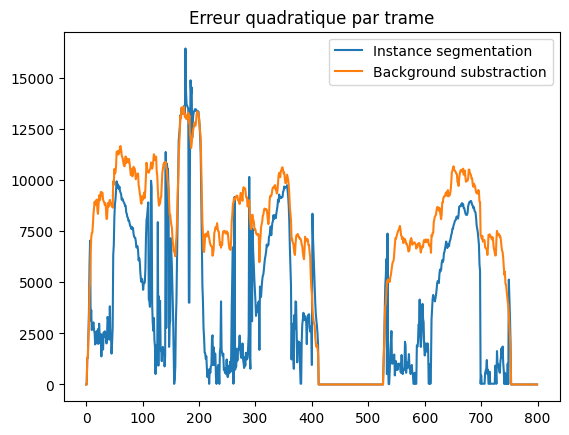

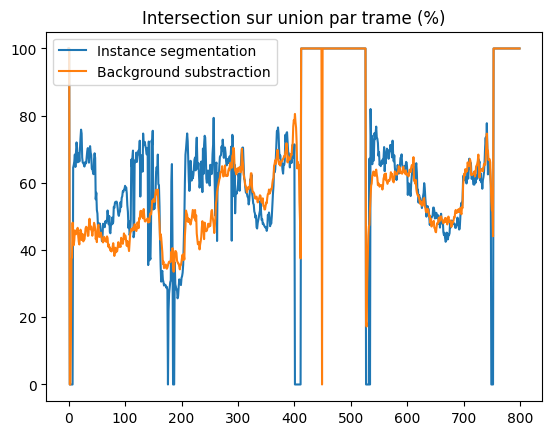

In [61]:
error_instance = []
error_background = [] 
iou_instance = []
iou_background = []
thresh = 1
for i in range(300,1100) :
    instance = cv2.imread('baseline/pedestrians/results/instance/re'+str(i).zfill(6)+'.png',cv2.IMREAD_GRAYSCALE)
    instance_bw = cv2.threshold(instance, thresh, 255, cv2.THRESH_BINARY)[1]
    background = cv2.imread('baseline/pedestrians/results/background/bg'+str(i).zfill(6)+'.png',cv2.IMREAD_GRAYSCALE)
    background_bw = cv2.threshold(background, thresh, 255, cv2.THRESH_BINARY)[1]
    groundtruth = cv2.imread('baseline/pedestrians/groundtruth/gt'+str(i).zfill(6)+'.png',cv2.IMREAD_GRAYSCALE)
    groundtruth_bw = cv2.threshold(groundtruth, thresh, 255, cv2.THRESH_BINARY)[1]
    error_instance.append(np.linalg.norm(groundtruth_bw - instance_bw))
    error_background.append(np.linalg.norm(groundtruth_bw - background_bw))
    
    num_instance = 0
    denum_instance = 0
    num_background = 0
    denum_background = 0
    for j in range(len(instance)):
        for k in range(len(instance[0])):
            if instance_bw[j][k] and groundtruth_bw[j][k]:
                num_instance += 1
            if instance_bw[j][k] or groundtruth_bw[j][k]:
                denum_instance += 1
            if background_bw[j][k] and groundtruth_bw[j][k]:
                num_background += 1
            if background_bw[j][k] or groundtruth_bw[j][k]:
                denum_background += 1    
    if denum_background == 0:
        iou_background.append(100)
    else:    
        iou_background.append(num_background/denum_background*100)
    if denum_instance == 0:
        iou_instance.append(100)
    else:    
        iou_instance.append(num_instance/denum_instance*100)
            


t = np.linspace(0, 799, 800,dtype=int) 
plt.plot(t, error_instance,label = "Instance segmentation")
plt.plot(t, error_background,label = "Background substraction")
plt.legend()
plt.title("Erreur quadratique par trame")
plt.show()

plt.plot(t, iou_instance,label = "Instance segmentation")
plt.plot(t, iou_background,label = "Background substraction")
plt.legend()
plt.title("Intersection sur union par trame (%)")
plt.show()

## Office

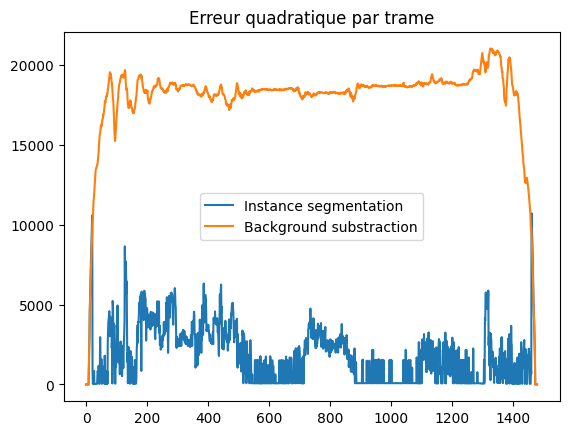

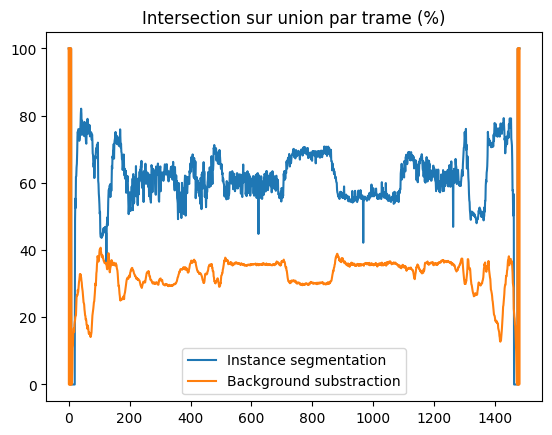

In [63]:
error_instance = []
error_background = [] 
iou_instance = []
iou_background = []
for i in range(570,2051) :
    instance = cv2.imread('baseline/office/results/instance/re'+str(i).zfill(6)+'.png',cv2.IMREAD_GRAYSCALE)
    instance_bw = cv2.threshold(instance, thresh, 255, cv2.THRESH_BINARY)[1]
    background = cv2.imread('baseline/office/results/background/bg'+str(i).zfill(6)+'.png',cv2.IMREAD_GRAYSCALE)
    background_bw = cv2.threshold(background, thresh, 255, cv2.THRESH_BINARY)[1]
    groundtruth = cv2.imread('baseline/office/groundtruth/gt'+str(i).zfill(6)+'.png',cv2.IMREAD_GRAYSCALE)
    groundtruth_bw = cv2.threshold(groundtruth, thresh, 255, cv2.THRESH_BINARY)[1]
    error_instance.append(np.linalg.norm(groundtruth_bw - instance_bw))
    error_background.append(np.linalg.norm(groundtruth_bw - background_bw))
    
    num_instance = 0
    denum_instance = 0
    num_background = 0
    denum_background = 0
    for j in range(len(instance)):
        for k in range(len(instance[0])):
            if instance_bw[j][k] and groundtruth_bw[j][k]:
                num_instance += 1
            if instance_bw[j][k] or groundtruth_bw[j][k]:
                denum_instance += 1
            if background_bw[j][k] and groundtruth_bw[j][k]:
                num_background += 1
            if background_bw[j][k] or groundtruth_bw[j][k]:
                denum_background += 1    
    if denum_background == 0:
        iou_background.append(100)
    else:    
        iou_background.append(num_background/denum_background*100)
    if denum_instance == 0:
        iou_instance.append(100)
    else:    
        iou_instance.append(num_instance/denum_instance*100)
            


t = np.linspace(0, 1480, 1481,dtype=int) 
plt.plot(t, error_instance,label = "Instance segmentation")
plt.plot(t, error_background,label = "Background substraction")
plt.legend()
plt.title("Erreur quadratique par trame")
plt.show()

plt.plot(t, iou_instance,label = "Instance segmentation")
plt.plot(t, iou_background,label = "Background substraction")
plt.legend()
plt.title("Intersection sur union par trame (%)")
plt.show()

## PETS2006

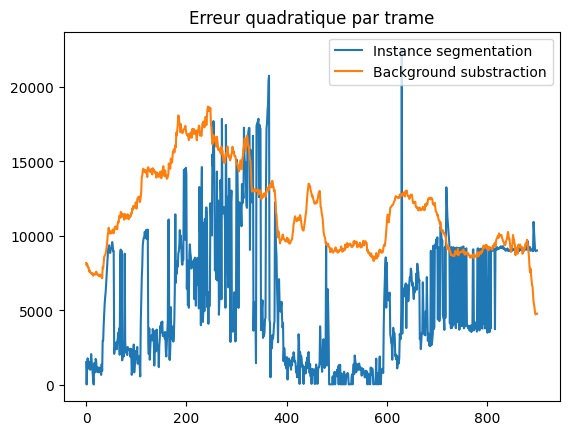

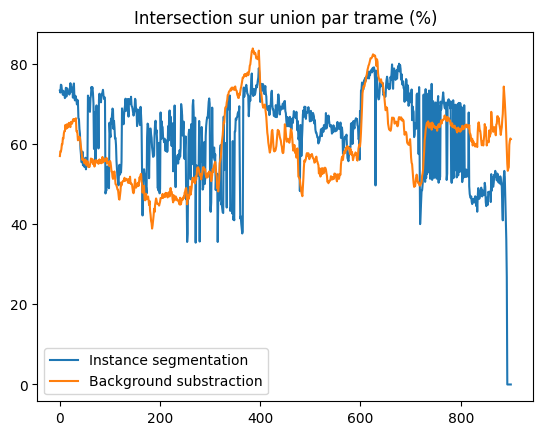

In [64]:
error_instance = []
error_background = [] 
iou_instance = []
iou_background = []
for i in range(300,1201) :
    instance = cv2.imread('baseline/PETS2006/results/instance/re'+str(i).zfill(6)+'.png',cv2.IMREAD_GRAYSCALE)
    instance_bw = cv2.threshold(instance, thresh, 255, cv2.THRESH_BINARY)[1]
    background = cv2.imread('baseline/PETS2006/results/background/bg'+str(i).zfill(6)+'.png',cv2.IMREAD_GRAYSCALE)
    background_bw = cv2.threshold(background, thresh, 255, cv2.THRESH_BINARY)[1]
    groundtruth = cv2.imread('baseline/PETS2006/groundtruth/gt'+str(i).zfill(6)+'.png',cv2.IMREAD_GRAYSCALE)
    groundtruth_bw = cv2.threshold(groundtruth, thresh, 255, cv2.THRESH_BINARY)[1]
    error_instance.append(np.linalg.norm(groundtruth_bw - instance_bw))
    error_background.append(np.linalg.norm(groundtruth_bw - background_bw))
    
    num_instance = 0
    denum_instance = 0
    num_background = 0
    denum_background = 0
    for j in range(len(instance)):
        for k in range(len(instance[0])):
            if instance_bw[j][k] and groundtruth_bw[j][k]:
                num_instance += 1
            if instance_bw[j][k] or groundtruth_bw[j][k]:
                denum_instance += 1
            if background_bw[j][k] and groundtruth_bw[j][k]:
                num_background += 1
            if background_bw[j][k] or groundtruth_bw[j][k]:
                denum_background += 1  
    if denum_background == 0:
        iou_background.append(100)
    else:    
        iou_background.append(num_background/denum_background*100)
    if denum_instance == 0:
        iou_instance.append(100)
    else:    
        iou_instance.append(num_instance/denum_instance*100)
            


t = np.linspace(0, 900, 901,dtype=int) 
plt.plot(t, error_instance,label = "Instance segmentation")
plt.plot(t, error_background,label = "Background substraction")
plt.legend()
plt.title("Erreur quadratique par trame")
plt.show()

plt.plot(t, iou_instance,label = "Instance segmentation")
plt.plot(t, iou_background,label = "Background substraction")
plt.legend()
plt.title("Intersection sur union par trame (%)")
plt.show()